
Model Comparison Table:

                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.986813       0.964912   0.975000  0.928571   
1        Decision Tree        1.000000       0.929825   0.904762  0.904762   
2        Random Forest        1.000000       0.973684   1.000000  0.928571   
3                  SVM        0.986813       0.973684   1.000000  0.928571   

   F1-score  
0  0.951220  
1  0.904762  
2  0.962963  
3  0.962963  


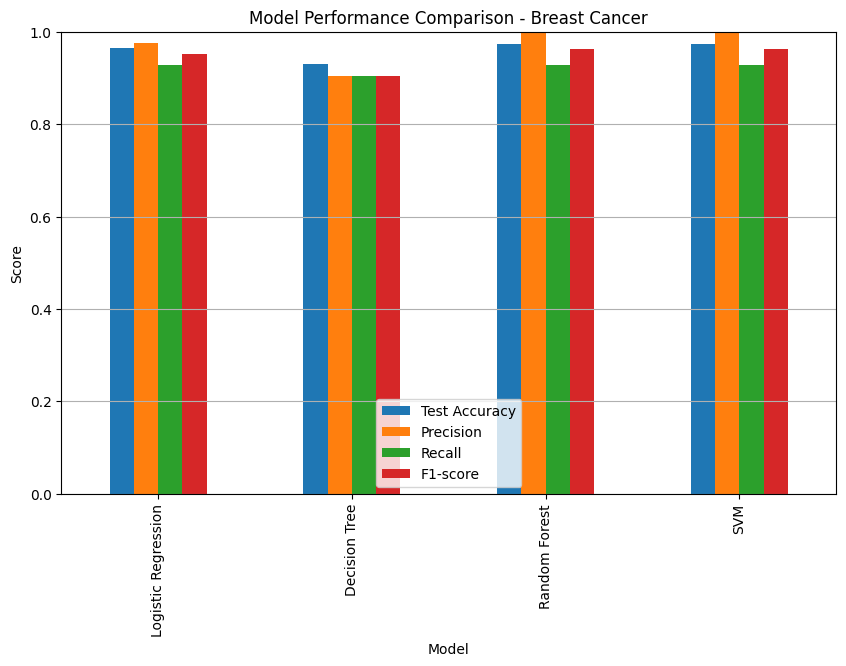


✅ Best model saved: SVM


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import joblib

file_path = "breast-cancer.csv"
df = pd.read_csv(file_path)

if 'id' in df.columns:
    df = df.drop(columns=['id'])

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

comparison = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    train_acc = model.score(X_train, y_train)

    comparison.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

comparison_df = pd.DataFrame(comparison)
print("\nModel Comparison Table:\n")
print(comparison_df)

comparison_df.set_index('Model')[['Test Accuracy', 'Precision', 'Recall', 'F1-score']].plot(
    kind='bar', figsize=(10,6)
)
plt.title("Model Performance Comparison - Breast Cancer")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

best_model_name = comparison_df.sort_values(by='F1-score', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]

joblib.dump(best_model, "best_model_breast_cancer.pkl")
print(f"\n✅ Best model saved: {best_model_name}")

# Task 14: Model Comparison & Best Model Selection (Breast Cancer)

**Tools:** Python, Scikit-learn, Pandas, Matplotlib, Joblib  

## Steps:
1. **Load Dataset:** Import CSV file and inspect data.  
2. **Preprocessing:**  
   - Drop irrelevant columns (`id`)  
   - Encode target (`diagnosis`: M=1, B=0)  
   - Fill missing values  
   - Scale features using `StandardScaler`  
3. **Train-Test Split:** 80-20 split, stratified on target.  
4. **Models Trained:**  
   - Logistic Regression  
   - Decision Tree  
   - Random Forest  
   - SVM  
5. **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, Train Accuracy (for overfitting check)  
6. **Comparison Table & Plot:** Compare model performance visually.  
7. **Best Model Selection:** Choose based on highest F1-score and save using `joblib`.  

## Deliverables:
- Model Comparison Table  
- Performance Bar Plot  
- Saved Best Model (`best_model_breast_cancer.pkl`)  
